<a href="https://colab.research.google.com/github/Jaskirat1/AIT_LinearRegression/blob/main/1000_companies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


In [2]:
df  = pd.read_csv('1000_Companies.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
dumm = pd.get_dummies(df.State)
dumm

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
...,...,...,...
995,1,0,0
996,1,0,0
997,1,0,0
998,1,0,0


In [5]:
X = pd.concat([df,dumm], axis = 1)
X

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.800,471784.1000,New York,192261.83000,0,0,1
1,162597.70,151377.590,443898.5300,California,191792.06000,1,0,0
2,153441.51,101145.550,407934.5400,Florida,191050.39000,0,1,0
3,144372.41,118671.850,383199.6200,New York,182901.99000,0,0,1
4,142107.34,91391.770,366168.4200,Florida,166187.94000,0,1,0
...,...,...,...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251,1,0,0
996,134970.00,130390.080,329204.0228,California,164336.60550,1,0,0
997,100275.47,241926.310,227142.8200,California,413956.48000,1,0,0
998,128456.23,321652.140,281692.3200,California,333962.19000,1,0,0


In [6]:
X.drop(['State'], axis = 1, inplace = True)


In [7]:
X

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.800,471784.1000,192261.83000,0,0,1
1,162597.70,151377.590,443898.5300,191792.06000,1,0,0
2,153441.51,101145.550,407934.5400,191050.39000,0,1,0
3,144372.41,118671.850,383199.6200,182901.99000,0,0,1
4,142107.34,91391.770,366168.4200,166187.94000,0,1,0
...,...,...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,95279.96251,1,0,0
996,134970.00,130390.080,329204.0228,164336.60550,1,0,0
997,100275.47,241926.310,227142.8200,413956.48000,1,0,0
998,128456.23,321652.140,281692.3200,333962.19000,1,0,0


In [9]:
y = X.iloc[:,3]
y

0      192261.83000
1      191792.06000
2      191050.39000
3      182901.99000
4      166187.94000
           ...     
995     95279.96251
996    164336.60550
997    413956.48000
998    333962.19000
999    476485.43000
Name: Profit, Length: 1000, dtype: float64

In [15]:
#X.drop(['Profit'], axis = 1, inplace = True)


In [12]:
X

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349.20,136897.800,471784.1000,0,0,1
1,162597.70,151377.590,443898.5300,1,0,0
2,153441.51,101145.550,407934.5400,0,1,0
3,144372.41,118671.850,383199.6200,0,0,1
4,142107.34,91391.770,366168.4200,0,1,0
...,...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,1,0,0
996,134970.00,130390.080,329204.0228,1,0,0
997,100275.47,241926.310,227142.8200,1,0,0
998,128456.23,321652.140,281692.3200,1,0,0


In [13]:
y

0      192261.83000
1      191792.06000
2      191050.39000
3      182901.99000
4      166187.94000
           ...     
995     95279.96251
996    164336.60550
997    413956.48000
998    333962.19000
999    476485.43000
Name: Profit, Length: 1000, dtype: float64

In [16]:
#splitting the data into testing and training

from sklearn.model_selection import train_test_split



In [17]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)


In [18]:
#Fitting Mutliple linear regression Model to training set

from sklearn.linear_model import LinearRegression



In [20]:
model_fit = LinearRegression()
model_fit.fit(X_train, y_train)

LinearRegression()

In [22]:
#Predict the Test set results

y_pred = model_fit.predict(X_test)
y_pred

array([ 89790.61532916,  88427.07187361,  94894.67836972, 175680.8672561 ,
        83411.73042089, 110571.90200074, 132145.2293644 ,  91473.37719687,
       164597.05380606,  53222.82667401,  66950.1905099 , 150566.43987004,
       126915.20858596,  59337.85971051, 177513.91053061,  75316.28143051,
       118248.14406603, 164574.40699901, 170937.28981069, 182069.11645084,
       118845.03252689,  85669.95112229, 180992.59396143,  84145.08220145,
       105005.83769214, 101233.56772747,  53831.07669092,  56881.41475225,
        68896.39346905, 210040.00765883, 120778.72270894, 111724.87157654,
       101487.90541518, 137959.02649623,  63969.95996744, 108857.91214126,
       186014.72531987, 171442.64130747, 174644.26529204, 117671.49128195,
        96731.37857434, 165452.25779409, 107724.34331255,  50194.54176914,
       116513.89532178,  58632.48986821, 158416.46827609,  78541.4852161 ,
       159727.66671743, 131137.87699644, 184880.70924515, 174609.08266879,
        93745.66352059,  

In [23]:
#calculate the coefficient & intercept 

print(model_fit.coef_)

[ 5.25845857e-01  8.44390881e-01  1.07574255e-01  5.26235224e+02
 -3.54301375e+02 -1.71933849e+02]


In [24]:
print(model_fit.intercept_)

-51561.464947771135


In [25]:
#Evaluating the model


from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.9112695892268795

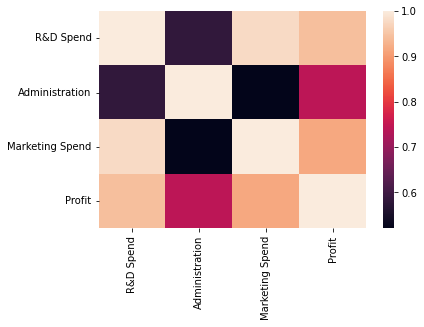

In [27]:
#heatmap 
hmap = sns.heatmap(df.corr())